In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("Housing.csv")

# Display first 5 rows
print(df.head())

# Check null values
print(df.isnull().sum())

# Convert categorical variables using one-hot encoding
df = pd.get_dummies(df, drop_first=True)


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
price               0
area                0
bedrooms            0
bathrooms           0
stories    

In [2]:
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop("price", axis=1)
y = df["price"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [4]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 970043.403920164
MSE: 1754318687330.6643
R2 Score: 0.6529242642153184


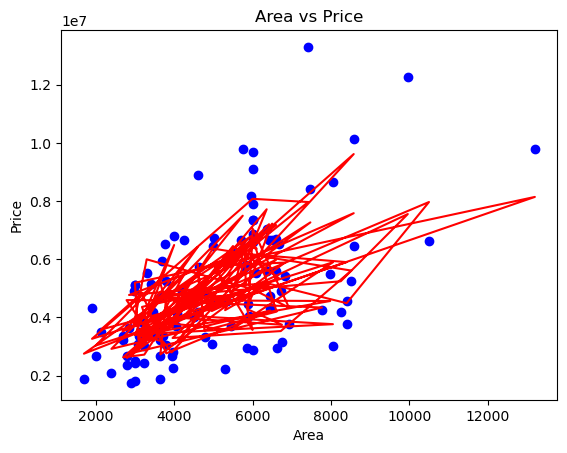

In [5]:
import matplotlib.pyplot as plt

# Simple regression example with one feature: 'area'
plt.scatter(X_test['area'], y_test, color='blue')
plt.plot(X_test['area'], model.predict(X_test), color='red')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Area vs Price')
plt.show()
